In [1]:
import pandas as pd
from scipy.io import arff
from pyspark.ml.feature import Imputer, StandardScaler

In [2]:
# Load the five years of data
year1 = pd.read_csv("csv_result-1year.csv")
year2 = pd.read_csv("csv_result-2year.csv")
year3 = pd.read_csv("csv_result-3year.csv")
year4 = pd.read_csv("csv_result-4year.csv")
year5 = pd.read_csv("csv_result-5year.csv")

/Users/nihalmathew/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,3,6,7,9,10,11,14,18,22,24,25,29,35,36,38,48,51,55,57,59) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/nihalmathew/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (15,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/nihalmathew/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,3,6,7,8,10,11,14,15,16,17,18,22,24,25,26,29,34,35,36,38,48,50,51,57,59) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_raw = pd.concat([year1, year2, year3, year4, year5], ignore_index=True)

df_raw


,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,...,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,2,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,...,0.1213,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,0
2,3,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,...,0.24114,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,0
3,4,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,5,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,...,0.13485,0.48431,0.86515,0.12444,6.3985,4.3158,127.21,2.8692,7.898,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,5906,0.012898,0.70621,0.038857,1.1722,-18.907,0,0.013981,0.416,1.6768,...,0.020169,0.043904,1.0122,1.2594,13.472,12.432,49.117,7.4313,2.2799,1
43401,5907,-0.57805,0.96702,-0.80085,0.16576,-67.365,-0.57805,-0.57805,-0.40334,0.93979,...,-0.064073,1.482,1.0641,-0.018084,110.72,44.759,81.22,4.494,5.1305,1
43402,5908,-0.17905,1.2553,-0.27599,0.74554,-120.44,-0.17905,-0.15493,-0.26018,1.1749,...,0.14888,0.54824,0.85112,-0.52243,9.8526,3.4892,207.87,1.7559,9.9527,1
43403,5909,-0.10886,0.74394,0.015449,1.0878,-17.003,-0.10886,-0.10918,0.12531,0.84516,...,-0.1832,-1.1677,1.1832,6.0924,13.886,6.0769,83.122,4.3911,0.95575,1


In [4]:
df_raw.columns

Index(['id', 'Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7',
       'Attr8', 'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14',
       'Attr15', 'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21',
       'Attr22', 'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28',
       'Attr29', 'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35',
       'Attr36', 'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42',
       'Attr43', 'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49',
       'Attr50', 'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56',
       'Attr57', 'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63',
       'Attr64', 'class'],
      dtype='object')

In [5]:
import pandas as pd
import numpy as np

float_cols = ['Attr' + str(i) for i in range(1, 65)]

# Replace '0' and '?' with NaN
df_raw[float_cols] = df_raw[float_cols].replace(['0', '?'], np.nan)

# Cast columns to float
df_raw[float_cols] = df_raw[float_cols].apply(pd.to_numeric, errors='coerce')

df_raw


,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,2,0.209120,0.49988,0.472250,1.94470,14.7860,NaN,0.258340,0.99601,1.69960,...,0.121300,0.420020,0.85300,NaN,4.1486,3.2732,107.350,3.4000,60.98700,0
2,3,0.248660,0.69592,0.267130,1.55480,-1.1523,NaN,0.309060,0.43695,1.30900,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,4,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,...,0.054015,0.142070,0.94598,NaN,4.5746,3.6147,86.435,4.2228,5.54970,0
4,5,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,5906,0.012898,0.70621,0.038857,1.17220,-18.9070,NaN,0.013981,0.41600,1.67680,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
43401,5907,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1
43402,5908,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1
43403,5909,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1


In [6]:
missing_values = df_raw.isna().sum()
print(missing_values)

id          0
Attr1     172
Attr2      80
Attr3      30
Attr4     136
         ... 
Attr61    224
Attr62    197
Attr63    252
Attr64    900
class       0
Length: 66, dtype: int64


In [7]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(15, 5))

plt.bar(missing_values.index, missing_values.values)
plt.title('Missing Values')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

<Figure size 1500x500 with 1 Axes>

In [8]:
missing_values = df_raw['Attr37'].isna().sum()
print(missing_values)

18997


In [9]:
#Removing the id and Atttr37 column
# select columns to drop
cols_to_drop = ['id']

# drop selected columns
df_raw = df_raw.drop(columns=cols_to_drop)
df_raw

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.472250,1.94470,14.7860,NaN,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,NaN,4.1486,3.2732,107.350,3.4000,60.98700,0
2,0.248660,0.69592,0.267130,1.55480,-1.1523,NaN,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,NaN,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,0.012898,0.70621,0.038857,1.17220,-18.9070,NaN,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
43401,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1
43402,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1
43403,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1


In [10]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Create a copy of the original dataframe
imputed_df = df_raw.copy()

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Impute the missing values
imputed_df[float_cols] = imputer.fit_transform(imputed_df[float_cols])

# Drop unwanted columns
imputed_df.drop('Attr37', axis=1, inplace=True)


# Rename the target column
imputed_df = imputed_df.rename(columns={'class_imputed': 'label'})




In [11]:
imputed_df.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43', 'Attr44',
       'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50', 'Attr51',
       'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57', 'Attr58',
       'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64', 'class'],
      dtype='object')

In [12]:
imputed_df['class'].value_counts()

0    41314
1     2091
Name: class, dtype: int64

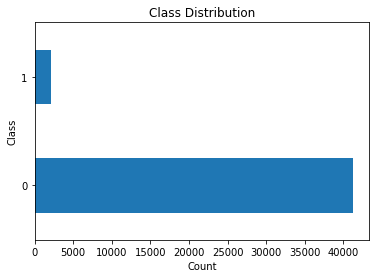

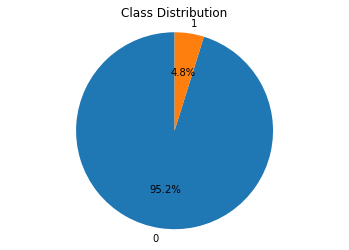

In [13]:
import matplotlib.pyplot as plt

class_counts = imputed_df['class'].value_counts()
labels = class_counts.index.tolist()
sizes = class_counts.values.tolist()

class_counts = imputed_df['class'].value_counts()
class_counts.plot(kind='barh')
plt.title('Class Distribution')
plt.xlabel('Count')
plt.ylabel('Class')
plt.show()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Class Distribution')
plt.show()



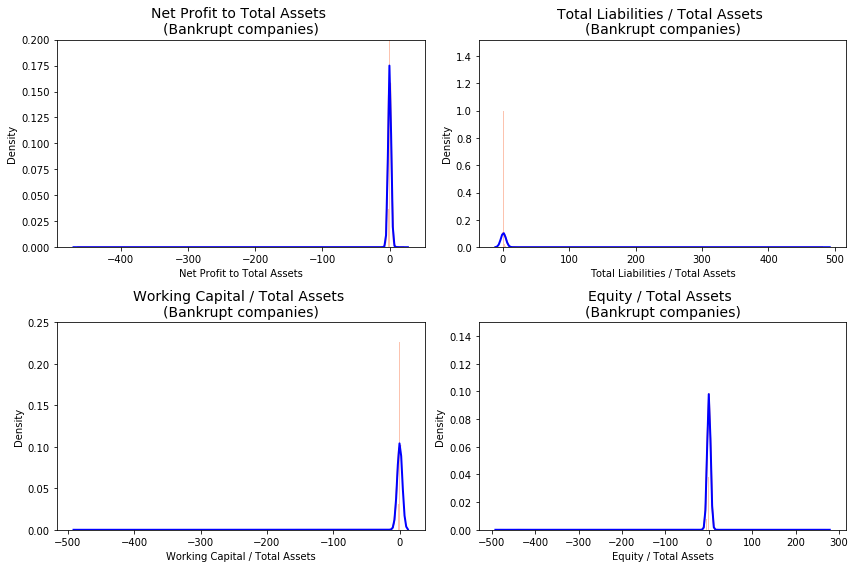

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Net Profit to Total Assets (Attr1)
cash_flow = imputed_df['Attr1'].loc[imputed_df['class'] == 1].values
sns.histplot(cash_flow, kde=True, stat="density", color='#FB8861', ax=axes[0, 0])
sns.kdeplot(cash_flow, color='blue', linewidth=2, ax=axes[0, 0])
axes[0, 0].set_title('Net Profit to Total Assets \n(Bankrupt companies)', fontsize=14)
axes[0, 0].set_xlabel('Net Profit to Total Assets')
axes[0, 0].set_ylabel('Density')
axes[0, 0].set_ylim(0, 0.2)

# Total Liabilities / Total Assets (Attr2)
cash_flow = imputed_df['Attr2'].loc[imputed_df['class'] == 1].values
sns.histplot(cash_flow, kde=True, stat="density", color='#FB8861', ax=axes[0, 1])
sns.kdeplot(cash_flow, color='blue', linewidth=2, ax=axes[0, 1])
axes[0, 1].set_title('Total Liabilities / Total Assets \n(Bankrupt companies)', fontsize=14)
axes[0, 1].set_xlabel('Total Liabilities / Total Assets')
axes[0, 1].set_ylabel('Density')

# Working Capital / Total Assets (Attr3)
cash_flow = imputed_df['Attr3'].loc[imputed_df['class'] == 1].values
sns.histplot(cash_flow, kde=True, stat="density", color='#FB8861', ax=axes[1, 0])
sns.kdeplot(cash_flow, color='blue', linewidth=2, ax=axes[1, 0])
axes[1, 0].set_title('Working Capital / Total Assets \n(Bankrupt companies)', fontsize=14)
axes[1, 0].set_xlabel('Working Capital / Total Assets')
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_ylim(0, 0.25)

# Equity / Total Assets (Attr10)
cash_flow = imputed_df['Attr10'].loc[imputed_df['class'] == 1].values
sns.histplot(cash_flow, kde=True, stat="density", color='#FB8861', ax=axes[1, 1])
sns.kdeplot(cash_flow, color='blue', linewidth=2, ax=axes[1, 1])
axes[1, 1].set_title('Equity / Total Assets \n(Bankrupt companies)', fontsize=14)
axes[1, 1].set_xlabel('Equity / Total Assets')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_ylim(0, 0.15)

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()
